## With all due respect Hamoye, you need to revisit this quiz. I feel cheated because I followed due procedure and I have an indepth understanding of this module. Yet I scored 45/100. Many of the questions did not have the correct answers in the options.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid', {'grid.linestyle': '--'})

In [2]:
# load all data
data = pd.read_csv('household_power_consumption.csv', infer_datetime_format=True,
                   parse_dates=['datetime'], index_col=['datetime'])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [3]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Sub_metering_4           25979
dtype: int64

## Fill the null values

In [4]:
# Filling missing values with mean

data_fillmean = data.fillna(data.mean())
data_fillmean.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

## Upsampling

In [5]:
data_daily = data_fillmean.resample('D').mean()
data_daily.index

DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', name='datetime', length=1442, freq='D')

In [6]:
data_fillmean.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


## Daily Predictions

In [7]:
data_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111
...,...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889,11.753194
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417,11.355741
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889,9.562130


In [8]:
# reset index
data_daily = data_daily.reset_index()
data_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


## Multi-Variate

In [9]:
mapping_1 = {'datetime':'ds', 'Global_active_power':'y',
           'Global_reactive_power':'A','Voltage':'B',
           'Global_intensity':'C','Sub_metering_1':'D',
           'Sub_metering_2':'E','Sub_metering_3':'F'}


dd = data_daily.rename(mapping_1, axis=1)
dd.head(2)

,ds,y,A,B,C,D,E,F,Sub_metering_4
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407


In [10]:
from fbprophet import Prophet

In [11]:
model = Prophet()

model.add_regressor('A')
model.add_regressor('B')
model.add_regressor('C')
model.add_regressor('D')
model.add_regressor('E')
model.add_regressor('F')


In [12]:
train = dd.iloc[:1442-365,:]
test = dd.iloc[1442-365:,:]

train.shape, test.shape

((1077, 9), (365, 9))

In [13]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Sulaimam\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
pred = model.predict(test)

In [15]:
pred.shape

(365, 40)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
def mape(test, pred):
    #calculating mape
    test_array = np.array(test['y'])
    pred_array = np.array(pred['yhat'])
    
    mape = np.mean(np.abs((test_array - pred_array) / test_array)) * 100
    return round(mape,4)

def rmse(test, pred):
    #calculate mrse
    test_array = np.array(test['y'])
    pred_array = np.array(pred['yhat'])
    
    mse = mean_squared_error(test_array, pred_array)
    rmse = np.sqrt(mse)
    return rmse

In [18]:
mape(test, pred)

3.0541

In [19]:
rmse(test, pred)

0.030479123500969228

C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


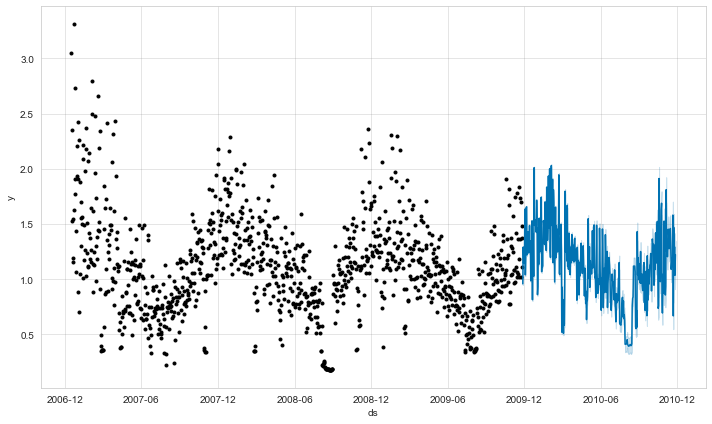

In [20]:
model.plot(pred)
plt.show()

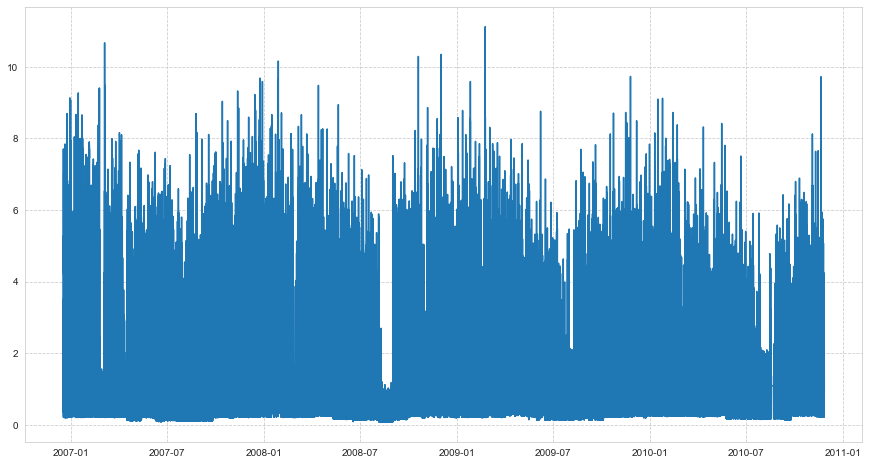

In [63]:
plt.plot(dd['Global_active_power'])

## UniVariate

In [21]:
ww = data_daily[['datetime','Global_active_power']]


mapping_2 = {'datetime':'ds', 'Global_active_power':'y'}
ww = ww.rename(mapping_2, axis=1)
ww.head(2)

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486


In [22]:
model = Prophet()

In [24]:
train = ww.iloc[:1442-365,:]
test = ww.iloc[1442-365:,:]

train.shape, test.shape

((1077, 2), (365, 2))

In [25]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Sulaimam\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [26]:
pred = model.predict(test)
pred.shape

(365, 19)

In [27]:
mape(test, pred)

20.812

In [28]:
rmse(test, pred)

0.2602322882384467